# CIS 520 Final Project

**DengAI**

**Pranav Panganamamula**

**Dinesh Jagai**

**Julian Schnitzler**

## Import Libraries

In [109]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.linear_model import LinearRegression, LogisticRegression

# Visualization
import matplotlib

%matplotlib inline

## Import and Process Data

In [112]:

X_train_base_imputed = pd.read_csv("data_mean_imputated/dengue_features_train_mean_imputed.csv")
#print(type(X_train_base_imputed.get_value(7, 'reanalysis_avg_temp_k')))
X_test_base_imputed = pd.read_csv("data_mean_imputated/dengue_features_test_mean_imputed.csv")
#print(type(X_test_base_imputed.get_value(7, 'reanalysis_avg_temp_k')))

X_train = pd.read_csv("data/dengue_features_train.csv")
#print(type(X_train.get_value(7, 'reanalysis_avg_temp_k')))
X_test = pd.read_csv("data/dengue_features_test.csv")
    
y_train = pd.read_csv("data/dengue_labels_train.csv")

data_train = pd.DataFrame.join(X_train_base_imputed, y_train, rsuffix = "_r")
data_train = data_train.drop(['city_r', 'year_r', 'weekofyear_r'], axis=1)

data_train_missing = pd.DataFrame.join(X_train, y_train, rsuffix = "_r")
data_train_regressed = data_train_missing.copy()
data_train_missing = data_train_missing.drop(['city_r', 'year_r', 'weekofyear_r'], axis=1)

data_train_sj = data_train[data_train['city'] == 'sj']
data_train_iq = data_train[data_train['city'] == 'iq']
data_train_sj = data_train_sj.drop(['city'], axis=1)
data_train_iq = data_train_iq.drop(['city'], axis=1)
#data_train_sj.head()
#print(type(data_train_sj.get_value(7, 'reanalysis_avg_temp_k')))

data_train_missing_sj = data_train_missing[data_train_missing['city'] == 'sj']
data_train_missing_iq = data_train_missing[data_train_missing['city'] == 'iq']
data = data_train_missing_sj.copy()
data2 = data_train_missing_iq.copy()
#print(list(data.columns.values.tolist()))
data_train_missing_sj = data_train_missing_sj.drop(['city'], axis=1)
data_train_missing_iq = data_train_missing_iq.drop(['city'], axis=1)
#print(data_train_regressed[data_train_regressed['year'] == 2010])
data_train_regressed.head()
# process data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_r,year_r,weekofyear_r,total_cases
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,2.628571,298.442857,6.900000,302.4,293.0,16.0,sj,1990,18,4
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,2.371429,299.714286,6.371429,304.7,295.2,8.6,sj,1990,19,5
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,2.300000,299.714286,6.485714,305.2,295.8,41.4,sj,1990,20,4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,2.428571,300.471429,6.771429,306.3,296.3,4.0,sj,1990,21,3
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,3.014286,301.942857,9.371429,308.0,296.9,5.8,sj,1990,22,6


In [113]:
y_train_sj = data_train_sj['total_cases']
X_train_sj = data_train_sj.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)
#print(list(X_train_sj.columns.values.tolist()))
#print(type(X_train_sj.get_value(7, 'reanalysis_avg_temp_k')))
X_train_sj_np = X_train_sj.to_numpy()
# for x in range(len(X_train_sj_np)):
#     for y in range(len(X_train_sj_np[0])):
#         print("x: ", x)
#         print("y: ", y)
#         print(type(X_train_sj_np[x, y]))
y_train_sj_np = y_train_sj.to_numpy()
y_train_sj_np = np.reshape(y_train_sj_np, (len(y_train_sj_np), 1))

y_train_iq = data_train_iq['total_cases']
X_train_iq = data_train_iq.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)

X_train_iq_np = X_train_iq.to_numpy()
y_train_iq_np = y_train_iq.to_numpy()
y_train_iq_np = np.reshape(y_train_iq_np, (len(y_train_iq_np), 1))

########################################################################

X_train_missing_sj = data_train_missing_sj.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)

X_train_missing_sj_np = X_train_missing_sj.to_numpy()

X_train_missing_iq = data_train_missing_iq.drop(['total_cases', 'week_start_date', 'year', 'weekofyear'], axis=1)

X_train_missing_iq_np = X_train_missing_iq.to_numpy()
#X_train_sj.info()
X_train_sj.head()
# print(X_train_iq_np.shape)
# print(y_train_iq_np.shape)
# print(X_train_missing_iq_np.shape)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,298.442857,6.900000,302.4,293.0,16.0
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,299.714286,6.371429,304.7,295.2,8.6
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,299.714286,6.485714,305.2,295.8,41.4
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,300.471429,6.771429,306.3,296.3,4.0
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,301.942857,9.371429,308.0,296.9,5.8


## Perform Regression Imputation on Data 

In [114]:
def regressedImpute(X_baseImputed, X_miss):
    '''
    Returns :
        X_imputed which has mean of the linearly regressed value instead of the missing values and same shape as X_miss.
    if computePerFeatureStatistics is True, also:
        list of Frobenius norms of difference between reconstructions and original data (without missing values) calculated after each imputing each column.
        list of accuracies on test set of Logistic Regression classifier trained on imputed data after each imputing each column.
    '''
#     for x in range(len(X_baseImputed)):
#         for y in range(len(X_baseImputed[0])):
#             print(type(X_baseImputed[x, y]))
    X_imputed = X_baseImputed.copy()
    (n, p) = X_imputed.shape

    # TODO 3.3.1 
    # We do a linear regression based imputation here, for each column, train a classifier to predict its value based on values of other features and
    # replace the NaN with the predicted values. 
    # IMPORTANT : You should not use regressed values from an earlier column to predict a later column, make sure to train the regression model on base imputed
    #             and not modify base imputed during the run.
    #             You can use X_miss to find which values were originally NaNs.
    
    for i in range(p):
        rows = np.isnan(X_miss[:, i]) 
        regress_rows = X_baseImputed[~rows]
        data = np.delete(regress_rows, i, 1)
        regress_y = X_baseImputed[~rows, i]
        missing = X_baseImputed[rows]
        miss = np.delete(missing, i, 1) 
        if (len(miss) == 0):
            continue
        #print(miss.shape)
#         for x in range(len(data)):
#             for y in range(len(data[0])):
#                 print(type(data[x, y]))
        #print(type(regress_y))
        clf = LinearRegression().fit(data, regress_y) 
        y_predict = clf.predict(miss)
        index = rows.nonzero()[0]
        np.put(X_imputed[:, i], index, y_predict) 

    return X_imputed
    

In [117]:
X_regressed_sj = regressedImpute(X_train_sj_np, X_train_missing_sj_np)
X_regressed_iq = regressedImpute(X_train_iq_np, X_train_missing_iq_np)

epochs = 5

# Here we show how repeated imputation using regression affect our dataset. For each epoch re-impute the data from previous
# epoch.

for i in range(epochs):
    # TODO 3.3.4 : Same as 3.3.3 but this time impute the data with the regression method you completed.
    X_copy_sj = X_regressed_sj.copy()
    X_copy_iq = X_regressed_iq.copy()
    X_regressed_sj = regressedImpute(X_copy_sj, X_train_missing_sj_np)
    X_regressed_iq = regressedImpute(X_copy_iq, X_train_missing_iq_np)

#print(X_regressed_iq[1430-936])

column_list = list(data_train_regressed.columns.values.tolist()) 
column_list.remove('city')
column_list.remove('year')
column_list.remove('weekofyear')
column_list.remove('week_start_date')
column_list.remove('total_cases')
column_list.remove('city_r')
column_list.remove('year_r')
column_list.remove('weekofyear_r')

sj_df = pd.DataFrame(X_regressed_sj, columns=column_list)
iq_df = pd.DataFrame(X_regressed_iq, columns=column_list)
#print(iq_df.loc[[1430-936]])
#print(list(data.columns.values.tolist()))
data = data.reset_index(drop=True)
data2 = data2.reset_index(drop=True)
data.update(sj_df)
data2.update(iq_df)
#print(data2.loc[(data2['year'] == 2010) & (data2['weekofyear'] == 53)])
#print(list(data.columns.values.tolist()))
data_reg = pd.concat([data, data2])
#print(list(data_reg.columns.values.tolist()))
data_reg = data_reg.reset_index(drop=True)
#print(list(data_reg.columns.values.tolist()))
# print(data_reg.loc[[936]])
# print(data_reg.loc[(data_reg['year'] == 2008) & (data_reg['weekofyear'] == 17)])
#print(data_reg.loc[[1430]])
data_reg.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,298.442857,6.900000,302.4,293.0,16.0,4
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,299.714286,6.371429,304.7,295.2,8.6,5
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,299.714286,6.485714,305.2,295.8,41.4,4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,300.471429,6.771429,306.3,296.3,4.0,3
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,301.942857,9.371429,308.0,296.9,5.8,6


In [60]:
export_csv = data_reg.to_csv(r'data_regressed_imputed\dengue_features_train_regressed_imputed.csv',
                                         index=None, header=True)

## Visualize Data

In [4]:
data_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30/04/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07/05/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14/05/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21/05/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28/05/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
data_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.137999,0.128653,0.203538,0.201964,45.747569,298.701469,299.225534,295.246470,...,82.164944,45.747569,16.746588,4.905737,27.193816,8.117668,32.463881,22.099229,39.528976,24.675137
std,5.408314,15.019437,0.152710,0.118489,0.073390,0.083420,43.538117,1.358754,1.257386,1.522631,...,7.141085,43.538117,1.537344,3.544748,1.274324,2.135484,1.952472,1.568237,47.164097,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,...,77.226429,9.960000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000,5.000000
50%,2002.000000,26.500000,0.107150,0.115133,0.195664,0.187779,38.170000,298.648571,299.276649,295.625714,...,80.287857,38.170000,17.084286,2.857143,27.446429,7.350000,32.800000,22.200000,24.450000,12.000000
75%,2005.000000,39.250000,0.234800,0.213429,0.248037,0.246914,70.047500,299.827500,300.207143,296.456071,...,86.437500,70.047500,17.974643,7.646429,28.128571,9.808333,33.900000,23.300000,55.525000,28.000000
max,2010.000000,53.000000,2.224100,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6EC0A63C8>,
      dtype=object)

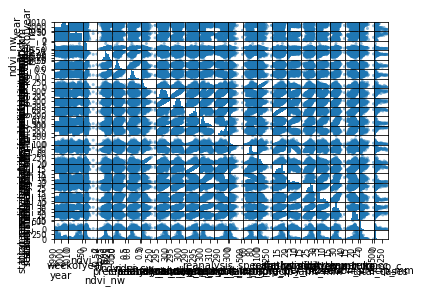

In [7]:
pd.plotting.scatter_matrix(data_train)

In [8]:
num_of_pca_components = None # t.b.d.: int or None
pca = PCA(n_components=num_of_pca_components)
data_PCA = pd.DataFrame(pca.fit_transform(X_train_sj))

In [9]:
print(data_PCA)

             0           1          2          3          4         5   \
0    -32.484709   11.473912   5.569918   8.109829  -7.481340  6.594674   
1    -25.942742   -8.526051   9.861375   5.213558  -8.614923  1.443826   
2      1.228578    0.419321 -14.762531   6.367252 -10.107026 -2.042120   
3    -37.800962   -8.570779  11.004606   1.955297  -9.092442 -2.563282   
4    -47.687549   -4.904831   6.999989   0.356523  -9.292826 -4.832637   
5    -30.706676   14.986757 -18.187186   2.198452  -9.350157 -4.050659   
6    -36.926630   26.802972  -6.689780   1.860071  -8.878861 -3.152173   
7    144.601346  -69.633807  31.869328   3.976244 -10.223384 -1.349194   
8    -19.547080   14.478312   4.464727  -0.341297  -8.929673 -4.255668   
9    -34.495694    4.310696  18.541130  -3.364695  -8.226558 -4.830063   
10    -1.506569   29.294021 -31.961508   0.503441  -9.500940 -1.781687   
11    29.624618   -8.122725  22.897044  -2.164164  -8.457955 -2.241526   
12   -18.005201   23.735719  -5.081701